In [2]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 
import yaml
import src.util as util

## Other
import os, joblib, missingno

## Load Config Data


In [4]:
params = util.load_config()


## Load Train Data


In [5]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")


In [6]:
x_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedroms_per_rooms,population_per_household,ocean_proximity
4602,-118.27,34.05,12.0,535.0,328.0,1194.0,365.0,1.2012,1.465753,0.613084,3.271233,1H OCEAN
6978,-118.03,33.97,32.0,2468.0,552.0,1190.0,479.0,3.8275,5.152401,0.223663,2.484342,1H OCEAN
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,5.000000,0.200000,2.752688,INLAND
2549,-124.17,40.79,43.0,2285.0,479.0,1169.0,482.0,1.9688,4.740664,0.209628,2.425311,NEAR OCEAN
11025,-117.82,33.79,26.0,2641.0,633.0,3657.0,617.0,4.1339,4.280389,0.239682,5.927066,1H OCEAN
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,0.151128,3.032258,1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,0.184825,3.904232,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,0.270823,3.332068,1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,0.166993,3.178891,1H OCEAN


In [7]:
y_train

4602     275000.0
6978     238500.0
16415    158300.0
2549      70500.0
11025    222300.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 17544, dtype: float64

In [9]:
df_housing = pd.concat([x_train, y_train], axis = 1)

In [10]:
## Check some info about the Dataset to (see nulls and DataTypes)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 4602 to 15795
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 17544 non-null  float64
 1   latitude                  17544 non-null  float64
 2   housing_median_age        17544 non-null  float64
 3   total_rooms               17544 non-null  float64
 4   total_bedrooms            17544 non-null  float64
 5   population                17544 non-null  float64
 6   households                17544 non-null  float64
 7   median_income             17544 non-null  float64
 8   rooms_per_household       17544 non-null  float64
 9   bedroms_per_rooms         17544 non-null  float64
 10  population_per_household  17544 non-null  float64
 11  ocean_proximity           17544 non-null  object 
 12  median_house_value        17544 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.9+ MB


In [11]:
## Show some statistics about the Dataset
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedroms_per_rooms,population_per_household,median_house_value
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,-119.581640,35.643209,28.583048,2638.277759,538.051699,1426.233527,499.773313,3.874514,5.435898,0.212892,3.088184,206841.525707
std,2.005554,2.136799,12.608318,2174.604528,418.388919,1134.393373,380.743801,1.895467,2.534940,0.057964,11.234644,115556.897508
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.888889,0.100000,0.692308,14999.000000
25%,-121.800000,33.930000,18.000000,1453.000000,296.000000,788.000000,280.000000,2.565750,4.447644,0.175240,2.430323,119300.000000
50%,-118.510000,34.265000,29.000000,2131.000000,437.000000,1168.000000,410.500000,3.540900,5.234564,0.202877,2.817937,179500.000000
75%,-118.010000,37.720000,37.000000,3153.000000,647.000000,1726.000000,606.000000,4.762850,6.058461,0.239614,3.280545,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333,500001.000000


In [12]:
## Check the nulls
df_housing.isna().sum(axis=0)  

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
rooms_per_household         0
bedroms_per_rooms           0
population_per_household    0
ocean_proximity             0
median_house_value          0
dtype: int64

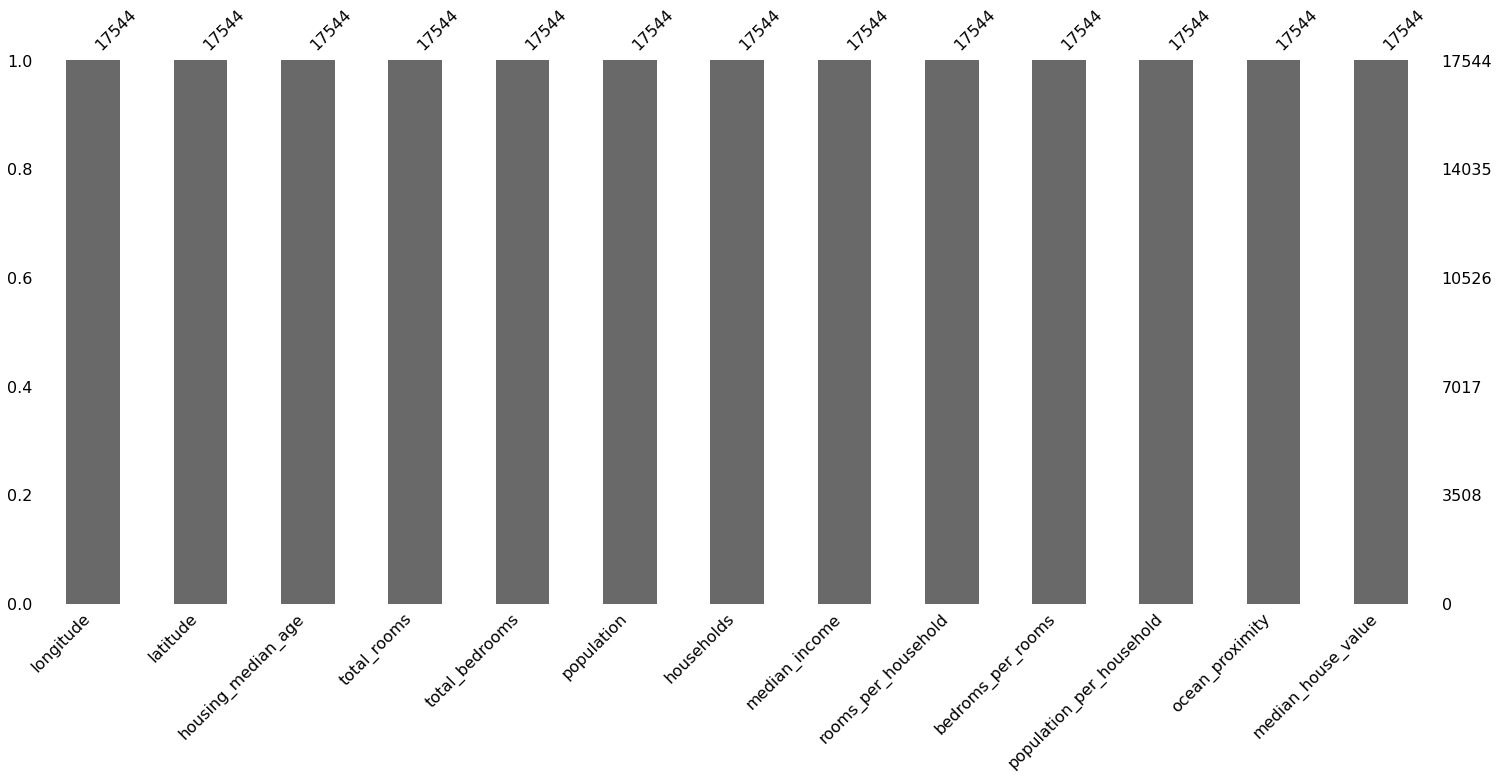

In [13]:
## check nulls using (missingno) library -- take care of the sum of above each bar
missingno.bar(df_housing);

* that Dataset is a contains 20640 instances and only 207 null values in **total_bedrooms** feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature` 

----------------

### EDA

### `Univariate Visualization`

categories of (ocean_proximity) --- 
 1H OCEAN      7767
INLAND        5582
NEAR OCEAN    2224
NEAR BAY      1966
ISLAND           5
Name: ocean_proximity, dtype: int64
********************************************************************************


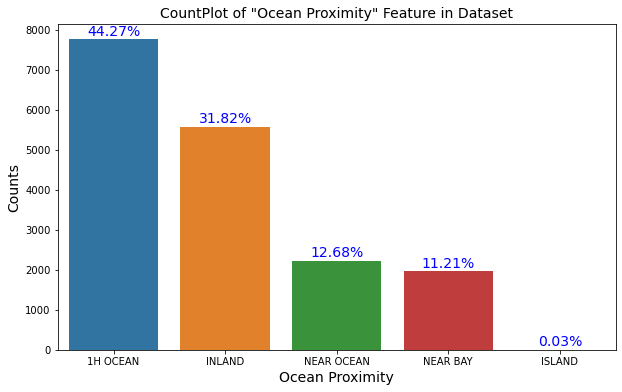

In [14]:
### Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = df_housing['ocean_proximity'].value_counts()
print('categories of (ocean_proximity) --- \n', ocean_values)
print('**'*40)


## Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df_housing, order=ocean_values.index)
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## To show the percentage of each bar
for i in range(len(ocean_values)):  ## loop over the numbers of categories (number of bars)
    each_count = ocean_values.values[i]
    each_text = f'{((100*each_count)/ len(df_housing)):.2f}%'
    plt.text(x=i, y=each_count+100, s=each_text, c='b', fontsize=14, ha='center')

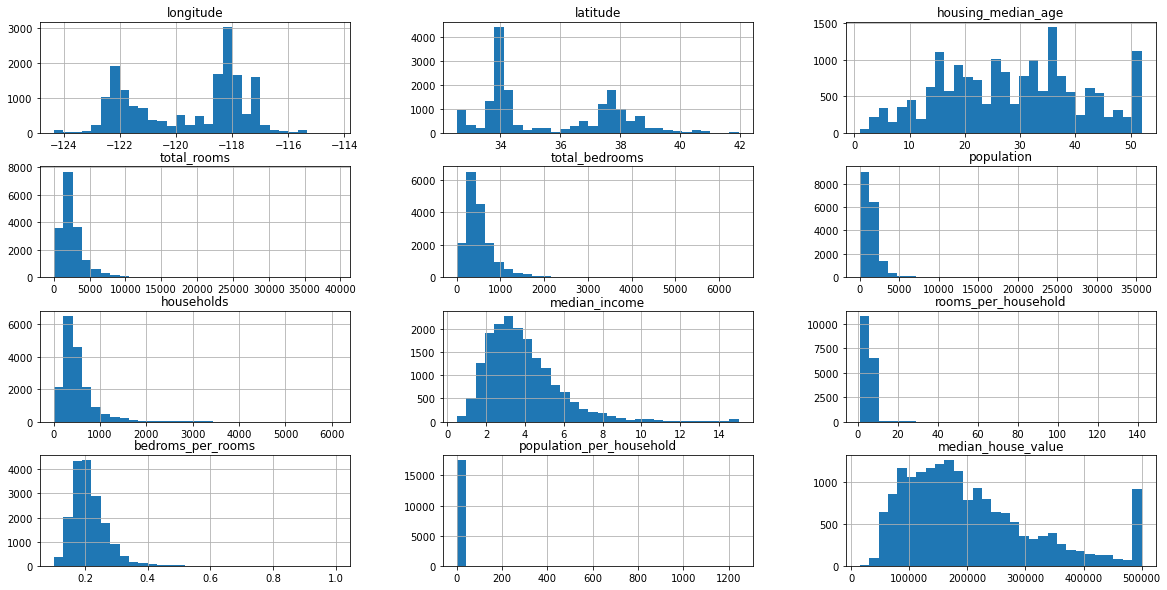

In [15]:
## Histogram Distr. of Numerical Features in Dataset
df_housing.hist(bins=30, figsize=(20, 10))
plt.show()

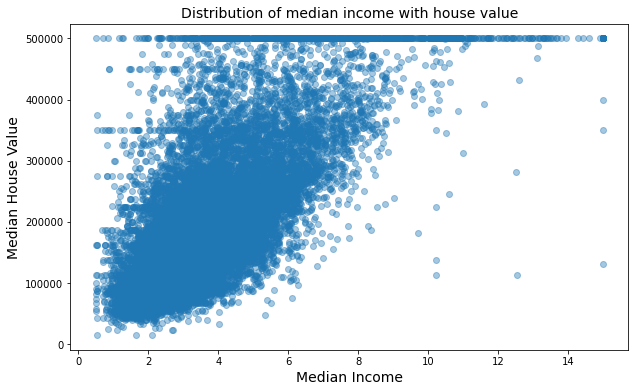

In [16]:
## Scatterplot with important Feature (medina_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], alpha=0.4)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

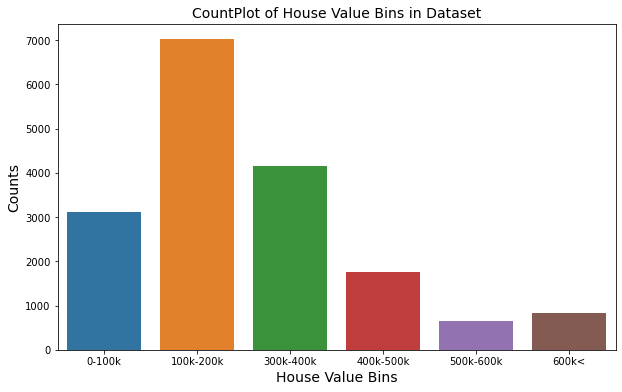

In [17]:
## Try for (median_house_value) to convert it into chunks (bins)
## Cut this Numerical Feature to Categorical One 
## Ex: for the following example -- any value between range (0-100k) will be the same category (like histogram)

house_value_bins = pd.cut(x=df_housing['median_house_value'], 
                          bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

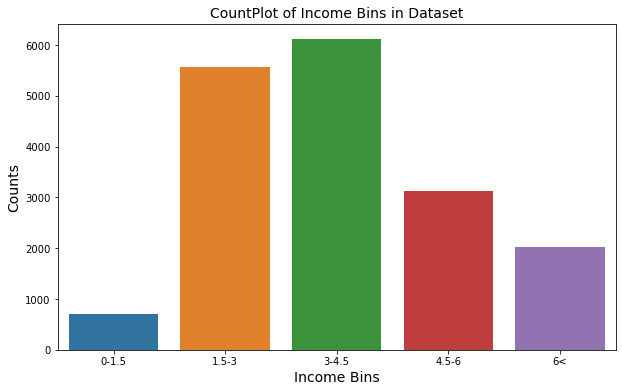

In [18]:
## Let's try the same above code for (median_income), I think it is very important Feature
income_bins = pd.cut(x=df_housing['median_income'], 
                     bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf], 
                     labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show() 

* It seems that the (<1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical

### `Bivariate Visualization`

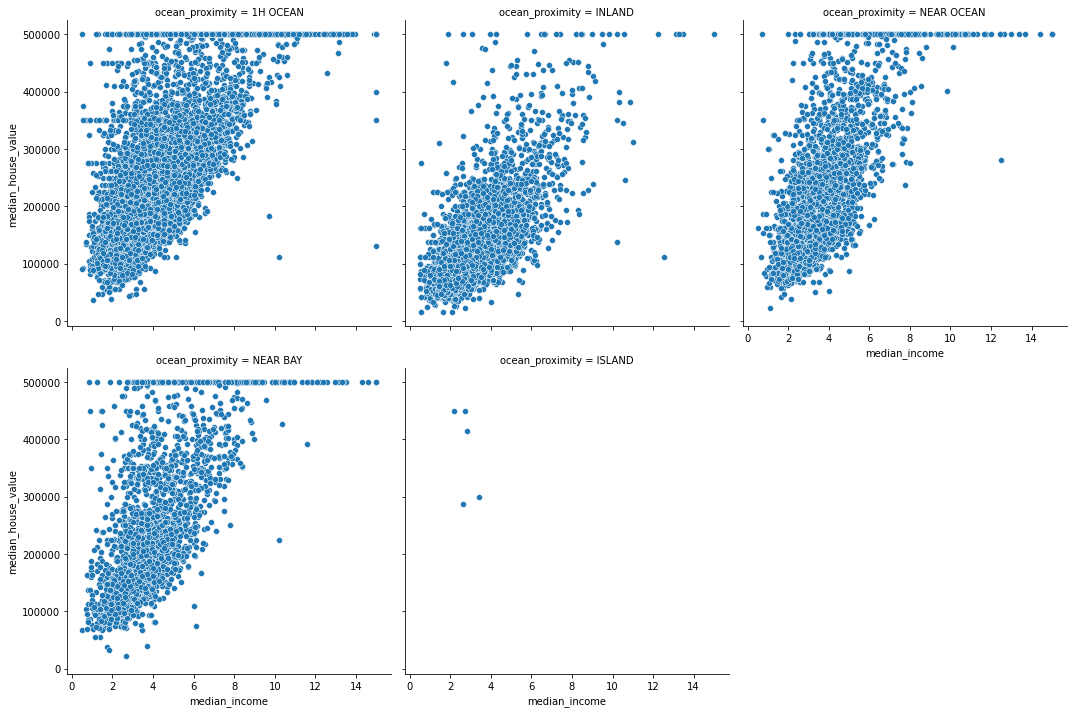

In [19]:
## Scatterplot with (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=df_housing, kind='scatter', 
            col='ocean_proximity', col_wrap=3)
plt.show()

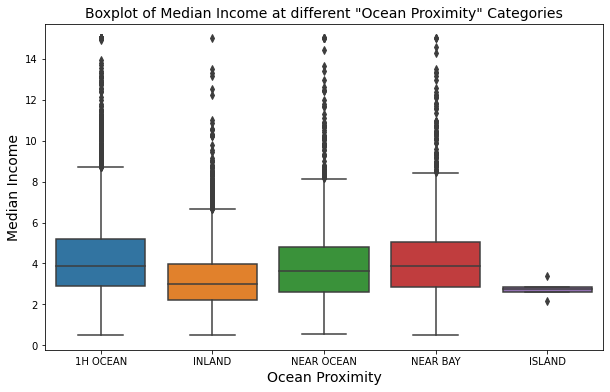

In [20]:
## Check the BoxPlot of the (median_income) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', data=df_housing, x='ocean_proximity')
plt.title('Boxplot of Median Income at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

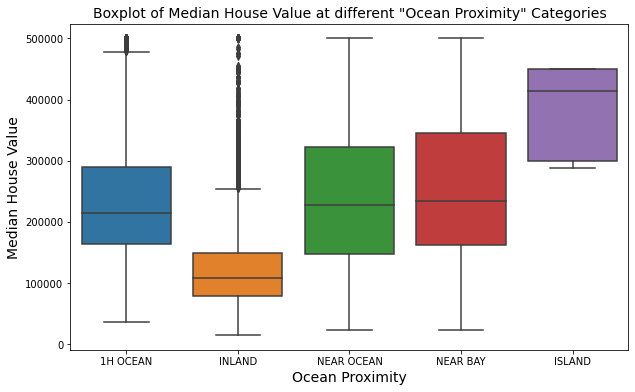

In [21]:
## Check the BoxPlot for (median_house_value) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=df_housing, x='ocean_proximity')
plt.title('Boxplot of Median House Value at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

* the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense ` 

### `Multivariate Visualization`

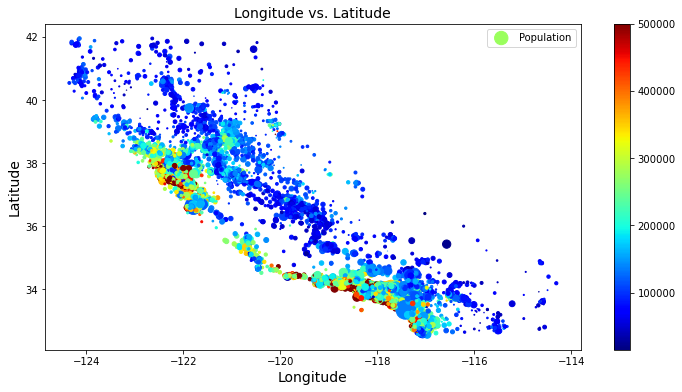

In [22]:
## ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=df_housing['longitude'], y=df_housing['latitude'], 
                 s=df_housing['population']/100, c=df_housing['median_house_value'], 
                 cmap=plt.get_cmap('jet'), label='Population')
plt.colorbar(sc)   ## colorbar
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

* The prices is higher near the ocean than other zones, and also these araes have higher population

---------

### `Check the Correlation between the Features and Target`

In [23]:
## Using pearson correlation
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689578
rooms_per_household         0.147479
total_rooms                 0.136640
housing_median_age          0.103215
households                  0.066578
total_bedrooms              0.051375
population_per_household   -0.022431
population                 -0.023750
longitude                  -0.046783
latitude                   -0.143238
bedroms_per_rooms          -0.254676
Name: median_house_value, dtype: float64

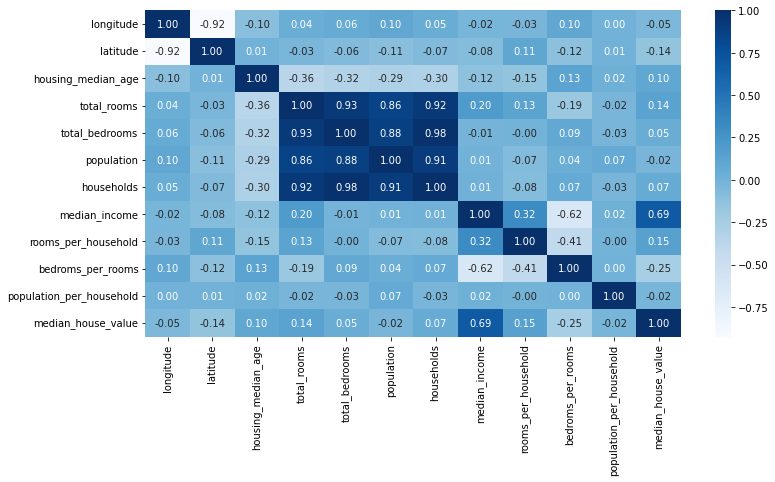

In [24]:
## you can show this as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_housing.corr(), annot=True, cmap='Blues', fmt='.2f')  ## symmetric matrix
plt.show()

* the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated

In [25]:
## check the correlation again
df_housing.corr()['median_house_value'].sort_values(ascending=False)  ## some progress for out new features (very good)

median_house_value          1.000000
median_income               0.689578
rooms_per_household         0.147479
total_rooms                 0.136640
housing_median_age          0.103215
households                  0.066578
total_bedrooms              0.051375
population_per_household   -0.022431
population                 -0.023750
longitude                  -0.046783
latitude                   -0.143238
bedroms_per_rooms          -0.254676
Name: median_house_value, dtype: float64

* Some progress for out new features (very good), Strong correlation